## 4. Multilayer perceptron

In [1]:
import keras
from  keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


### Loading the data:

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
x_train.shape # 6000 probek 28 na 28

(60000, 28, 28)

In [8]:
print(y_train.shape)
print(y_test.shape)

print('liczba danych treningowych: ', x_train.shape[0])
print('liczba danych testowych:', x_test.shape[0])
print('rozmiar pojedynczego obrazka:',x_train[0].shape)

(60000,)
(10000,)
liczba danych treningowych:  60000
liczba danych testowych: 10000
rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

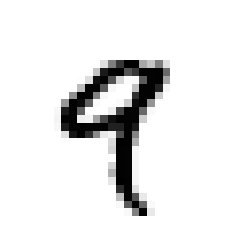

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4], cmap='Greys')#pierwszy obrazek
plt.axis('off') 
#obrazek jest 28 na 28 pixeli, bialy ekran macierz 0 , czarny 255 


### Few pictures

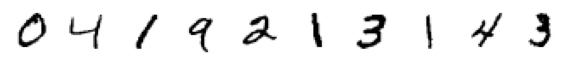

In [16]:
plt.figure(figsize=(10,10))
for i in range(1,11):
  plt.subplot(1,10,i)#1 wiersz 10 kolumn, po czym iterujemy
  plt.axis('off')
  plt.imshow(x_train[i],cmap='Greys')
plt.show()

In [17]:
y_train #5 to piątka

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Preprocessing:

In [0]:
x_train=x_train.reshape(60000,28*28)
#x_train.shape #skalujemy na 1 wektor
x_test=x_test.reshape(10000,28*28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#skalujemy dane bo sieci sobie lepiej radza
x_train=x_train /255
x_test=x_test /255

In [0]:
y_train= keras.utils.to_categorical(y_train, num_classes=10)
y_test= keras.utils.to_categorical(y_test, num_classes=10)

In [26]:
y_train[0] # na ktorym miejscu jest nasza liczba czyli 5 na 5 miejscu

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building classification model:

In [33]:
model =Sequential()
model.add(Dense(units=512,activation='relu',input_shape=(28*28,)))#wybiera sie koombinacje 2jki 
#funkcja aktywacji dzieki temu model uczy się nie liniowo
#warstwy geste, help: model.add(Dense)
model.add(Dense(units=512, activation='relu')) #warstwa ukryta
model.add(Dense(units=10,activation='softmax')) #tyle neuronow ile naszych klas , warstwa wyjsciowa

model.summary() #output ile bedzie probek, #param parametry do nauki 401920  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy']) #kompilujemy modelik

## Model training

In [36]:
history= model.fit(x_train, y_train, batch_size=128, epochs=20,
                   validation_data=(x_test,y_test)) 
#po 128 probkach przelicza sie gradient
#epochs 20 razy zbior zostanie przetworzony przez sieć
#validation - opcjonalnie , mozemy kontrolowac jak model zachowuje sie na danych treningowych 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2234 - accuracy: 0.9293 - val_loss: 0.0970 - val_accuracy: 0.9683
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.0814 - val_accuracy: 0.9740
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0990 - val_accuracy: 0.9709
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0697 - val_accuracy: 0.9807
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0785 - val_accuracy: 0.9788
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0806 - val_accuracy: 0.9811
Epoch 7/20
60000/60000 [==============================] - 7s 1

In [37]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 65us/step


[0.17755315613799177, 0.9811999797821045]

In [39]:
history.history # wartosci dla kazdej iteracji

{'accuracy': [0.9292833,
  0.97505,
  0.9828167,
  0.98755,
  0.9907167,
  0.9923667,
  0.9942167,
  0.99541664,
  0.9959667,
  0.9963833,
  0.997,
  0.99745,
  0.9975833,
  0.99763334,
  0.99801666,
  0.99836665,
  0.9983,
  0.9985833,
  0.9986,
  0.99845],
 'loss': [0.22344567580223085,
  0.08197045746246974,
  0.05410521042247613,
  0.03987307421118021,
  0.030975376977895697,
  0.023104158020066098,
  0.01875639910607909,
  0.015640988226840274,
  0.013662214041753516,
  0.011610230364547655,
  0.010087989549333846,
  0.008606649847502316,
  0.009296136014569622,
  0.007513309853977808,
  0.006910895861824883,
  0.006091820354634122,
  0.006327445583906607,
  0.005235553130096438,
  0.004547920802756509,
  0.005420623259407262],
 'val_accuracy': [0.9682999849319458,
  0.9739999771118164,
  0.9708999991416931,
  0.9807000160217285,
  0.9787999987602234,
  0.9811000227928162,
  0.9790999889373779,
  0.9815999865531921,
  0.9824000000953674,
  0.9807000160217285,
  0.9749000072479248,

## Funcitons of accuration and loss


In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # sns.set()

    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    
    """
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # sns.set()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    
def display_augmented_images(directory, index):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[index]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(20, 14))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

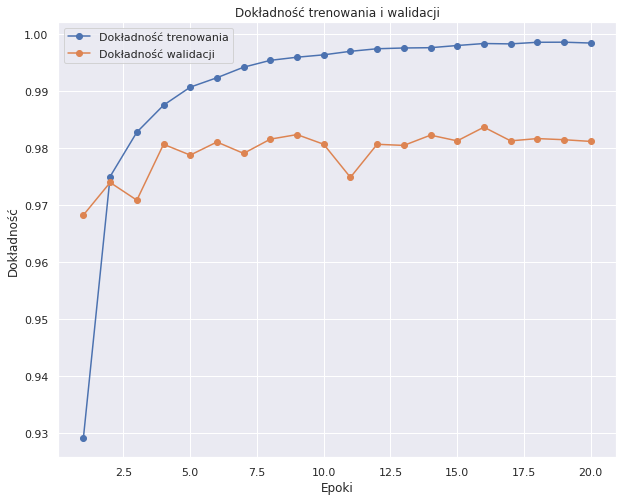

In [47]:
make_accuracy_plot(history)

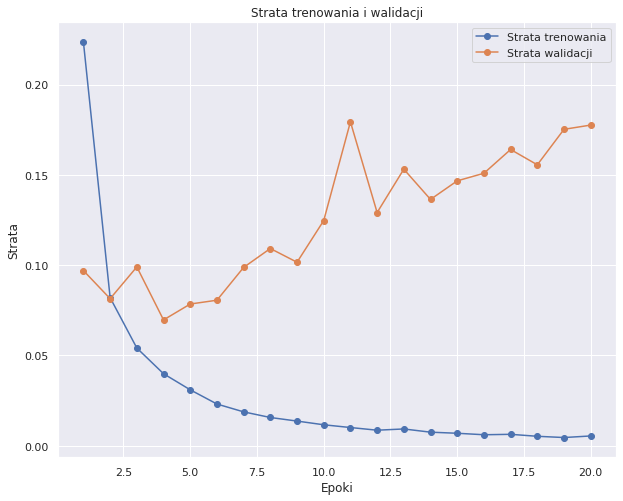

In [48]:
make_loss_plot(history)

## We should stop learning in epoch number 6. (overfitting)